# MetPy

Another newer module is currently being developed at Unidata, in conjunction with folks from all over the meteorological field, that is designed for doing specific meteorological calculations and plots. Today we are going to use the MetPy module to plot a skewT, and see some of the calculations that can be done as a part of the module.

There are currently three different parts of MetPy
- constants
 * Earth
 * Water
 * Dry Air
 * General Meteorology Constants
- units
- io
 * CDM
 * File Formats
- calc
 * Basic Calculations
 * Kinematic Calculations
 * Thermodynamic Calculations
 * Turbulence Time Series Calculations
- plots
 * Skew-T
 * Station Plots
 * Colortables
    
The latest information can be found on the github site

https://unidata.github.io/MetPy/latest/

Examples:

https://unidata.github.io/MetPy/latest/examples/index.html


## SkewT Plot with Python

Let's make a Skew-T plot in Python using MetPy. We'll need a few modules including numpy, matplotlib, and MetPy.

We will read in data generated from the University of Wyoming and slightly modified

http://weather.uwyo.edu/upperair/sounding.html

The main difference between the output from this site and reading them in below is removing/modifying lines that have missing data. Remove lines at pressures below 100 mb that contain missing data; put in a missing value for levels below 100 mb (e.g., -999).

In [1]:
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime, timezone
from metpy.io import get_upper_air_data
import metpy.calc as mcalc
from metpy.plots import SkewT
from metpy.units import units

MetPy has a remote data access function to retrieve data from either the Wyoming historical sounding collection or the Iowa State archive. The examples we'll do below use the Wyoming (which is the default for metpy) site for our historical balloon data.

We are going to read in data from 11 January 2005 at 12 UTC during an extreme warm frontal passage in Oklahoma.

## Time in Python

datetime module (https://docs.python.org/3/library/datetime.html)

datetime string format (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
* similar to Linux date function
* `%Y` is year
* `%m` is numeric month
* `%d` is numeric day
* `%H` is hour
* `%M` is minute

In [2]:
# Pull time from computer
d = datetime.utcnow()
print(d)

# Specify format of date obtained from computer
print(d.strftime('%Y %m %d %H %M'))

# Save pieces to different variables
year = d.strftime('%Y')
month = d.strftime('%m')
day = d.strftime('%d')
hour = d.strftime('%H')


2017-10-17 18:41:34.694849
2017 10 17 18 41


In [3]:
# Construct a datetime object

mybday = datetime(1981,6,20,2,59)
print(mybday.toordinal()) # Gives day since 1/1/1 of the date object

print("Days I've Lived: ", d.toordinal()-mybday.toordinal())

723351
Days I've Lived:  13268


## Get Sounding Data

Use datetime object to get data from wyoming sounding archive

In [4]:
dataset = get_upper_air_data(datetime(2005, 1, 11, 12), 'OUN', source='wyoming')

/Users/kgoebber/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: MetpyDeprecationWarning: The get_upper_air_data function was deprecated in version 0.6. This function is being moved to the Siphon package.
  if __name__ == '__main__':


## Pull out data from dataset variable

The above function essentially gives us a dictionary that has an assortment of different data

In [5]:
print(list(dataset.variables))

['pressure', 'height', 'temperature', 'dewpoint', 'u_wind', 'v_wind', 'speed', 'direction']


## Pulling out data

The dataset object is a standard format dictionary that many different data read functions produce. To access a variable you'll reference the dataset variable name (dataset) with selecting the variable from the directionary as a string.

```python
dataset.variables['pressure'][:]
```

In [6]:
# Get all of the pressure data from the dataset
p = dataset.variables['pressure'][:]

# Only want to pull in data up to 100 mb, so find
# the index value from the 100 mb level
ip100 = np.where(p.magnitude==100.)[0][0]+1

# Subset pressure and read in other data to only 100 mb
p = p[:ip100]
T = dataset.variables['temperature'][:ip100]
Td = dataset.variables['dewpoint'][:ip100]
u = dataset.variables['u_wind'][:ip100]
v = dataset.variables['v_wind'][:ip100]

## Units in MetPy

MetPy has a units class that allows you to attach the appropriate units to an array and make easy converstions to different units when needed.

In [7]:
print(T)

[  1.   -1.1  -0.5   5.4  11.   10.8   9.4   9.2  10.2  11.   11.6  13.2  12.7  12.2  11.1   8.5   5.9   3.2  -1.5  -3.9  -6.2  -9.9 -10.8 -12.7 -16.7 -20.4 -23.2 -24.3 -26.3 -30.1 -31.1 -32.9 -34.9 -40.4 -43.3 -44. -44.5 -45.5 -48.3 -49.5 -53.1 -54.3 -59.1 -59.5 -59.6 -59.9 -59.9 -59.8 -59.7 -59.6 -59.4 -59.3 -59.3 -59.5 -63.3 -63.2 -61.2 -61.1] degC


In [8]:
print(T.to('degF'))

[ 33.8000004  30.0200004  31.1000004  41.7200004  51.8000004  51.4400004  48.9200004  48.5600004  50.3600004  51.8000004  52.8800004  55.7600004  54.8600004  53.9600004  51.9800004  47.3000004  42.6200004  37.7600004  29.3000004  24.9800004  20.8400004  14.1800004  12.5600004   9.1400004   1.9400004  -4.7199996  -9.7599996 -11.7399996 -15.3399996 -22.1799996 -23.9799996 -27.2199996 -30.8199996 -40.7199996 -45.9399996 -47.1999996 -48.0999996 -49.8999996 -54.9399996 -57.0999996 -63.5799996 -65.7399996 -74.3799996 -75.0999996 -75.2799996 -75.8199996 -75.8199996 -75.6399996 -75.4599996 -75.2799996 -74.9199996 -74.7399996 -74.7399996 -75.0999996 -81.9399996 -81.7599996 -78.1599996 -77.9799996] degF


In [9]:
print(T.to('degK'))

[ 274.15  272.05  272.65  278.55  284.15  283.95  282.55  282.35  283.35  284.15  284.75  286.35  285.85  285.35  284.25  281.65  279.05  276.35  271.65  269.25  266.95  263.25  262.35  260.45  256.45  252.75  249.95  248.85  246.85  243.05  242.05  240.25  238.25  232.75  229.85  229.15  228.65  227.65  224.85  223.65  220.05  218.85  214.05  213.65  213.55  213.25  213.25  213.35  213.45  213.55  213.75  213.85  213.85  213.65  209.85  209.95  211.95  212.05] kelvin


Not everything currently handles the fact that there are units attached to arrays, so there is a method to get just the values of an array by appending *.magnitude* to the end of the variable name.

In [10]:
print(u)

[  1.21553724  17.32050808  17.20219293  15.55634919  14.16021393  13.76583447  21.65063509  22.83863644  23.33951066  23.18221983  23.90867275  25.93666531  27.57461708  31.92204961  35.          36.43788686  40.37711787  38.63703305  34.64101615  31.17691454  30.81446476  33.47066646  33.80740392  38.00043253  44.31634889  40.40678269  44.43258801  44.63360341  43.84665292  43.33154113  41.36192563  36.43788686  36.5444686   34.86681443  45.65712298  51.19406879  52.62278676  54.50217201  69.42945478  73.41093075  70.69200739  66.16046845  77.86219737  79.20591776  75.17540966  59.08846518  65.68295619  50.8059296   58.26094249  78.78462024  74.71460236  72.72221296  74.          68.9054379   54.16442642  53.17961866  57.77929249          nan] knot


In [11]:
print(u.magnitude)

[  1.21553724  17.32050808  17.20219293  15.55634919  14.16021393
  13.76583447  21.65063509  22.83863644  23.33951066  23.18221983
  23.90867275  25.93666531  27.57461708  31.92204961  35.          36.43788686
  40.37711787  38.63703305  34.64101615  31.17691454  30.81446476
  33.47066646  33.80740392  38.00043253  44.31634889  40.40678269
  44.43258801  44.63360341  43.84665292  43.33154113  41.36192563
  36.43788686  36.5444686   34.86681443  45.65712298  51.19406879
  52.62278676  54.50217201  69.42945478  73.41093075  70.69200739
  66.16046845  77.86219737  79.20591776  75.17540966  59.08846518
  65.68295619  50.8059296   58.26094249  78.78462024  74.71460236
  72.72221296  74.          68.9054379   54.16442642  53.17961866
  57.77929249          nan]


## Plotting the Skew-T

MetPy has the ability to make a few specialty plots (with matplotlib as a backend). The skew-T plots are relatively easy to do with only a few lines to plot the key variables and lines on the plot.

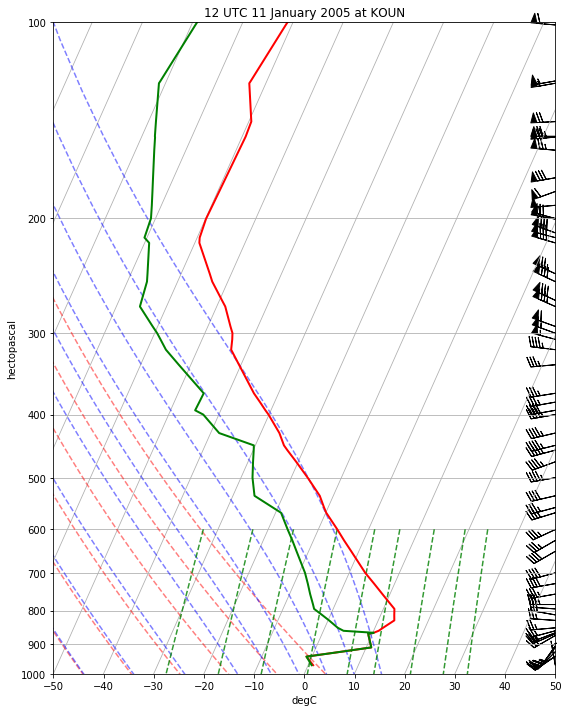

In [12]:
%matplotlib inline
# Change default to be better for skew-T
fig = plt.figure(figsize=(8, 10))
skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r',lw=2)
skew.plot(p, Td, 'g',lw=2)
skew.plot_barbs(p[:-1], u[:-1], v[:-1])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50,50)

plt.title('12 UTC 11 January 2005 at KOUN')
plt.tight_layout()
# Show the plot
plt.savefig('test_skewt.png',dpi=150)
plt.show()

## Thermodynamic Calculations

MetPy has in increasing number of available calculations that can be performed on sounding data.

* Lifted Index
* LCL
* LFC
* EL
* CAPE
* CIN

Documentation of MetPy calculations at https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html



In [13]:
#from metpy.calc import potential_temperature
theta = mcalc.potential_temperature(p,T)
print(theta)

[ 276.54552646  276.81672204  277.54524164  284.82236869  291.81688646  292.07946948  293.68825498  294.00071896  295.33389658  296.75714327  298.27976546  302.2109307   303.36934399  304.67442269  304.84352321  305.24877149  305.65529903  305.98778458  307.4076724   308.06135745  308.81132285  309.72151884  310.30200881  311.73044701  312.5977513  313.06839229  313.26910063  313.39933413  314.77044961  315.76148948  315.82276537  316.06692621  316.25147944  317.98236285  318.83512834  321.19603123  322.49350491  323.28719961  325.79293231  326.08283774  326.95476058  327.7816885   330.72862913  331.86136603  333.31733938  337.51095627  337.70362509  342.38594368  347.35874167  352.36520155  362.66210847  367.65643127  367.93694866  373.10806121  380.93842558  382.00243065  408.08611349  409.3248447 ] kelvin


In [14]:
# Calculate full parcel profile and add to plot as black line
# Requires that the variables have associated units
prof = mcalc.parcel_profile(p, T[0], Td[0]).to('degC')
print(prof)

[   1.           -0.67546358   -0.75195631   -1.56008387   -2.3533556   -2.64693868   -4.57841948   -4.90990539   -5.09541491   -5.46936739   -6.03775287   -7.46612985   -8.54125791   -9.71882434  -10.58722609  -12.68070318  -14.82751719  -17.05125517  -21.63153466  -23.98829783  -26.3724243   -30.07053489  -31.2371523   -33.85860702  -37.90737197  -41.46536335  -44.07274729  -45.13829033  -47.8744085   -51.94808776  -52.88431282  -54.66337453  -56.58341878  -62.68034037  -65.84129138  -67.98297031  -69.24995898  -70.63605434  -74.6567179   -75.88966922  -79.57826456  -81.11830098  -87.00074833  -87.9825082   -88.87740024  -91.42215221  -91.52581573  -93.92529823  -96.40805542  -98.83746041 -103.62787065 -105.85242737 -105.97997437 -108.45102811 -114.70560507 -115.07163197 -123.76592682 -124.14773723] degC


Now lets read in a different dataset from 4 May 1999 at 00 UTC

In [15]:
dataset2 = get_upper_air_data(datetime(1999, 5, 4, 0), 'OUN', source='wyoming')

p2 = dataset2.variables['pressure'][:]
T2 = dataset2.variables['temperature'][:]
Td2 = dataset2.variables['dewpoint'][:]
u2 = dataset2.variables['u_wind'][:]
v2 = dataset2.variables['v_wind'][:]

/Users/kgoebber/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: MetpyDeprecationWarning: The get_upper_air_data function was deprecated in version 0.6. This function is being moved to the Siphon package.
  if __name__ == '__main__':


In [16]:
# Here is some code to read in a local Wyoming file that has been slightly modified.
#p2, T2, Td2, direc2, spd2 = np.genfromtxt('KOUN_1999050318_raob.txt', usecols=(0, 2, 3, 6, 7),
#                                          unpack=True, skip_header=7, missing_values=-999, usemask=True)
#u2, v2 = metcalc.get_wind_components(spd2, np.deg2rad(direc2))

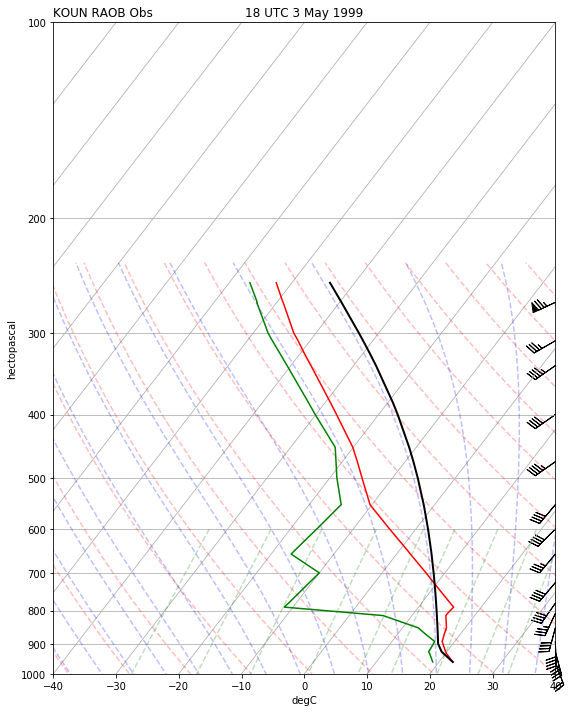

In [17]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(8,10))
skew = SkewT(fig,rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p2, T2, 'r')
skew.plot(p2, Td2, 'g')
skew.plot_barbs(p2[:-1:2], u2[:-1:2], v2[:-1:2])

# Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233,533,10)*units('K'),alpha=0.25)
skew.plot_moist_adiabats(t0=np.arange(233,323,5)*units('K'),alpha=0.25)
skew.plot_mixing_lines(alpha=0.25)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40,40)

# Calculate full parcel profile and add to plot as black line
# Requires that the variables have associated units
prof = mcalc.parcel_profile(p2, T2[0], Td2[0]).to('degC')
skew.plot(p2, prof, 'k', linewidth=2)

# Make some titles
plt.title('KOUN RAOB Obs',loc='left')
plt.title('18 UTC 3 May 1999')

# Show the plot
plt.tight_layout()
#plt.savefig('KOUN_1999050318_skewt.png',dpi=150)
plt.show()

## Problem #1

Plot a sounding for today from a location of your choice! You may want to use the RAP site for the three-letter identifier for the U.S. Sounding sites.

http://weather.rap.ucar.edu/upper
